In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
rookiedata = pd.read_csv('rookie_data.csv')
rookiedata.head()

index           Name  Hall of Fame Class  Year Drafted    GP   MIN   PTS  \
0      0    Jeff Taylor                 NaN        1982.0  44.0  17.6   3.6   
1      1  Charles Smith                 NaN        1988.0  71.0  30.4  16.3   
2      2     Mark Davis                 NaN        1988.0  33.0   7.8   3.8   
3      3  Charles Smith                 NaN        1989.0  60.0   8.7   2.9   
4      4  Michael Smith                 NaN        1989.0  65.0   9.5   5.0   

   FGM   FGA   FG%  ...  FTA   FT% OREB  DREB  REB  AST  STL  BLK  TOV   EFF  
0  1.5   3.6  40.0  ...  1.0  65.2  0.6   1.2  1.8  2.5  0.9  0.3  1.4   5.2  
1  6.1  12.4  49.5  ...  5.5  72.5  2.4   4.1  6.5  1.5  1.0  1.3  2.1  16.7  
2  1.5   3.1  48.0  ...  1.0  82.4  0.5   0.6  1.1  0.4  0.4  0.1  0.4   3.8  
3  1.0   2.2  44.4  ...  1.3  69.7  0.2   0.9  1.2  1.7  0.6  0.1  0.6   4.1  
4  2.1   4.4  47.6  ...  1.0  82.8  0.6   0.9  1.5  1.2  0.1  0.0  0.8   4.6  

[5 rows x 24 columns]

In [3]:
rookiedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               2013 non-null   int64  
 1   Name                1537 non-null   object 
 2   Hall of Fame Class  26 non-null     float64
 3   Year Drafted        1537 non-null   float64
 4   GP                  1537 non-null   float64
 5   MIN                 1537 non-null   float64
 6   PTS                 1537 non-null   float64
 7   FGM                 1537 non-null   float64
 8   FGA                 1537 non-null   float64
 9   FG%                 1537 non-null   float64
 10  3P Made             1537 non-null   float64
 11  3PA                 1537 non-null   float64
 12  3P%                 1537 non-null   object 
 13  FTM                 1537 non-null   float64
 14  FTA                 1537 non-null   float64
 15  FT%                 1537 non-null   float64
 16  OREB  

We will first clean the data by removing the empty rows

In [4]:
rookiedata.dropna(subset=['Name'], inplace=True)

In [5]:
# Change the year drafted to type int64
rookiedata['Year Drafted'] = rookiedata['Year Drafted'].astype('int')
rookiedata.loc[rookiedata['3P%'] == '-', '3P%'] = 0
rookiedata['3P%'] = rookiedata['3P%'].astype('float64')

We will change the Hall of Fame class to indicate "1" if the player has made it into the hall of fame, and "0" if the player did not make it into the hall of fame.

In [6]:
# Making Hall of Fame  as True and False.
rookiedata.loc[rookiedata['Hall of Fame Class'].isnull() == False, 'Hall of Fame Class'] = 1
rookiedata.loc[rookiedata['Hall of Fame Class'].isnull() == True, 'Hall of Fame Class'] = 0
rookiedata['Hall of Fame Class'] = rookiedata['Hall of Fame Class'].astype('int')
rookiedata.rename(columns={"Hall of Fame Class": "Hall of Fame"}, inplace=True)

Now we will remove all duplicated names to effectively merge the two datasets using the names as the unique key.

In [7]:
rookiedata.drop_duplicates(subset=["Name"], keep=False, inplace=True, ignore_index=True)
rookiedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         1526 non-null   int64  
 1   Name          1526 non-null   object 
 2   Hall of Fame  1526 non-null   int64  
 3   Year Drafted  1526 non-null   int64  
 4   GP            1526 non-null   float64
 5   MIN           1526 non-null   float64
 6   PTS           1526 non-null   float64
 7   FGM           1526 non-null   float64
 8   FGA           1526 non-null   float64
 9   FG%           1526 non-null   float64
 10  3P Made       1526 non-null   float64
 11  3PA           1526 non-null   float64
 12  3P%           1526 non-null   float64
 13  FTM           1526 non-null   float64
 14  FTA           1526 non-null   float64
 15  FT%           1526 non-null   float64
 16  OREB          1526 non-null   float64
 17  DREB          1526 non-null   float64
 18  REB           1526 non-null 

In [8]:
rookiedata

index               Name  Hall of Fame  Year Drafted    GP   MIN   PTS  \
0        11       Andrew Toney             0          1980  75.0  23.6  12.9   
1        12       Bill Hanzlik             0          1980  74.0  17.0   5.4   
2        13      Bill Laimbeer             0          1980  81.0  30.4   9.8   
3        14         Billy Reid             0          1980  59.0  10.1   3.2   
4        15       Butch Carter             0          1980  54.0  12.4   5.6   
...     ...                ...           ...           ...   ...   ...   ...   
1521   1532     Taurean Prince             0          2016  20.0  10.0   3.4   
1522   1533   Tomas Satoransky             0          2016  23.0  14.7   3.1   
1523   1534      Troy Williams             0          2016  24.0  17.4   5.3   
1524   1535    Wade Baldwin IV             0          2016  22.0  13.5   3.5   
1525   1536  Willy Hernangomez             0          2016  28.0  13.6   5.5   

      FGM   FGA   FG%  ...  FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  \
0     5.3  10.7  49.5  ...  3.0  71.2   0.4   1.5  1.9  3.6  0.8  0.1  2.9   
1     1.9   3.9  47.8  ...  2.0  79.3   0.9   1.2  2.1  1.5  0.8  0.3  1.1   
2     4.2   8.3  50.3  ...  1.9  76.5   3.3   5.3  8.6  2.7  0.7  1.0  1.6   
3     1.4   3.1  45.4  ...  0.7  56.4   0.5   0.6  1.0  1.2  0.6  0.1  1.3   
4     2.1   4.6  46.2  ...  1.8  73.7   0.6   0.6  1.2  1.0  0.4  0.0  0.9   
...   ...   ...   ...  ...  ...   ...   ...   ...  ...  ...  ...  ...  ...   
1521  1.2   3.1  39.3  ...  0.7  85.7   0.2   1.8  2.0  0.7  0.3  0.3  0.7   
1522  1.3   3.2  39.7  ...  0.7  64.7   0.4   1.1  1.5  2.2  0.5  0.0  0.9   
1523  2.1   5.1  41.8  ...  1.0  60.0   0.3   1.6  1.8  0.8  1.0  0.4  1.1   
1524  1.2   3.8  31.3  ...  1.3  82.1   0.3   1.1  1.5  2.1  0.6  0.3  1.3   
1525  2.3   4.1  56.0  ...  1.1  71.9   1.5   3.2  4.7  0.8  0.3  0.5  1.2   

       EFF  
0     10.2  
1      6.4  
2     16.5  
3      2.8  
4      4.3  
...    ...  
1521   4.0  
1522   4.2  
1523   4.8  
1524   3.8  
1525   8.5  

[1526 rows x 24 columns]

## Combining the two datasets

Since only retired players can be elected to be in the NBA hall of fame, we need to add in the year retired for each of the rookies in the dataset.

In [9]:
playerdata = pd.read_csv('player_data.csv')
playerdata.head()

name  year_start  year_end position height  weight  \
0       Alaa Abdelnaby        1991      1995      F-C   6-10   240.0   
1      Zaid Abdul-Aziz        1969      1978      C-F    6-9   235.0   
2  Kareem Abdul-Jabbar        1970      1989        C    7-2   225.0   
3   Mahmoud Abdul-Rauf        1991      2001        G    6-1   162.0   
4    Tariq Abdul-Wahad        1998      2003        F    6-6   223.0   

         birth_date                                college  
0     June 24, 1968                        Duke University  
1     April 7, 1946                  Iowa State University  
2    April 16, 1947  University of California, Los Angeles  
3     March 9, 1969             Louisiana State University  
4  November 3, 1974              San Jose State University

In [10]:
# Create a new dataframe with name and year_end
df0 = playerdata[["name", "year_end"]].copy()
# Change the column names
df0.rename(columns={"name": "Name", "year_end": "Retired"}, inplace=True)
# Remove null values
df0.dropna(subset=['Name'], inplace=True)
# Remove duplicates
df0.drop_duplicates(subset=["Name"], keep=False, inplace=True)

Since we are only interested in whether or not the player is retired, we can modify the "Retired" column to indicate True if the player is retired and False if the player is not retired.

In [11]:
df0.loc[df0['Retired'] == 2018, 'Retired'] = 0
df0.loc[df0['Retired'] != 0, 'Retired'] = 1
df0['Retired'] = df0['Retired'].astype('int')

In [12]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4453 entries, 0 to 4549
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     4453 non-null   object
 1   Retired  4453 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 104.4+ KB


In [13]:
rookiedata = rookiedata.merge(df0, left_on=["Name"], right_on=["Name"])
rookiedata

index               Name  Hall of Fame  Year Drafted    GP   MIN   PTS  \
0        11       Andrew Toney             0          1980  75.0  23.6  12.9   
1        12       Bill Hanzlik             0          1980  74.0  17.0   5.4   
2        13      Bill Laimbeer             0          1980  81.0  30.4   9.8   
3        14         Billy Reid             0          1980  59.0  10.1   3.2   
4        15       Butch Carter             0          1980  54.0  12.4   5.6   
...     ...                ...           ...           ...   ...   ...   ...   
1457   1529    Rodney McGruder             0          2016  30.0  25.7   5.8   
1458   1530     Semaj Christon             0          2016  33.0  15.6   3.0   
1459   1533   Tomas Satoransky             0          2016  23.0  14.7   3.1   
1460   1534      Troy Williams             0          2016  24.0  17.4   5.3   
1461   1536  Willy Hernangomez             0          2016  28.0  13.6   5.5   

      FGM   FGA   FG%  ...   FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  \
0     5.3  10.7  49.5  ...  71.2   0.4   1.5  1.9  3.6  0.8  0.1  2.9  10.2   
1     1.9   3.9  47.8  ...  79.3   0.9   1.2  2.1  1.5  0.8  0.3  1.1   6.4   
2     4.2   8.3  50.3  ...  76.5   3.3   5.3  8.6  2.7  0.7  1.0  1.6  16.5   
3     1.4   3.1  45.4  ...  56.4   0.5   0.6  1.0  1.2  0.6  0.1  1.3   2.8   
4     2.1   4.6  46.2  ...  73.7   0.6   0.6  1.2  1.0  0.4  0.0  0.9   4.3   
...   ...   ...   ...  ...   ...   ...   ...  ...  ...  ...  ...  ...   ...   
1457  2.1   5.3  40.0  ...  72.4   1.5   2.0  3.5  1.5  0.7  0.3  0.7   7.5   
1458  1.3   4.0  31.8  ...  52.9   0.4   1.0  1.4  2.5  0.4  0.1  0.7   3.7   
1459  1.3   3.2  39.7  ...  64.7   0.4   1.1  1.5  2.2  0.5  0.0  0.9   4.2   
1460  2.1   5.1  41.8  ...  60.0   0.3   1.6  1.8  0.8  1.0  0.4  1.1   4.8   
1461  2.3   4.1  56.0  ...  71.9   1.5   3.2  4.7  0.8  0.3  0.5  1.2   8.5   

      Retired  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
1457        1  
1458        1  
1459        0  
1460        0  
1461        0  

[1462 rows x 25 columns]

## Splitting the data

We will now split the data into two: retired and non-retired players, because only retired players can make it into the hall of fame. We will subsequently use the model to determine if these non-retired players will make it into the hall of fame based on their rookie statistics.

In [14]:
rookiedata_retired = rookiedata.drop(rookiedata[rookiedata['Retired'] == 0].index)
rookiedata_active = rookiedata.drop(rookiedata[rookiedata['Retired'] == 1].index)

In [15]:
rookiedata_retired.reset_index(drop=True, inplace=True)
rookiedata_retired.drop(columns="Name", inplace=True)
rookiedata_retired

index  Hall of Fame  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  \
0        11             0          1980  75.0  23.6  12.9  5.3  10.7  49.5   
1        12             0          1980  74.0  17.0   5.4  1.9   3.9  47.8   
2        13             0          1980  81.0  30.4   9.8  4.2   8.3  50.3   
3        14             0          1980  59.0  10.1   3.2  1.4   3.1  45.4   
4        15             0          1980  54.0  12.4   5.6  2.1   4.6  46.2   
...     ...           ...           ...   ...   ...   ...  ...   ...   ...   
1186   1468             0          2015  57.0  12.2   5.0  2.0   4.9  41.0   
1187   1486             0          2015  35.0  11.3   2.4  0.8   2.3  35.0   
1188   1488             0          2015  53.0  16.4   4.5  1.8   4.3  42.2   
1189   1529             0          2016  30.0  25.7   5.8  2.1   5.3  40.0   
1190   1530             0          2016  33.0  15.6   3.0  1.3   4.0  31.8   

      3P Made  ...   FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  Retired  
0         0.1  ...  71.2   0.4   1.5  1.9  3.6  0.8  0.1  2.9  10.2        1  
1         0.0  ...  79.3   0.9   1.2  2.1  1.5  0.8  0.3  1.1   6.4        1  
2         0.0  ...  76.5   3.3   5.3  8.6  2.7  0.7  1.0  1.6  16.5        1  
3         0.0  ...  56.4   0.5   0.6  1.0  1.2  0.6  0.1  1.3   2.8        1  
4         0.1  ...  73.7   0.6   0.6  1.2  1.0  0.4  0.0  0.9   4.3        1  
...       ...  ...   ...   ...   ...  ...  ...  ...  ...  ...   ...      ...  
1186      0.6  ...  79.2   0.2   1.3  1.5  1.9  0.6  0.1  0.8   5.4        1  
1187      0.3  ...  72.7   0.1   1.3  1.4  1.1  0.3  0.1  0.7   2.9        1  
1188      0.3  ...  93.1   0.3   1.4  1.7  3.4  0.5  0.1  1.5   6.2        1  
1189      0.8  ...  72.4   1.5   2.0  3.5  1.5  0.7  0.3  0.7   7.5        1  
1190      0.2  ...  52.9   0.4   1.0  1.4  2.5  0.4  0.1  0.7   3.7        1  

[1191 rows x 24 columns]

In [16]:
rookiedata_active.reset_index(drop=True, inplace=True)
rookiedata_active

index               Name  Hall of Fame  Year Drafted    GP   MIN   PTS  \
0      775      Dirk Nowitzki             0          1998  47.0  20.4   8.2   
1      801       Vince Carter             0          1998  50.0  35.2  18.3   
2      816        Jason Terry             0          1999  81.0  23.3   8.1   
3      851     Jamal Crawford             0          2000  61.0  17.2   4.6   
4      885        Joe Johnson             0          2001  77.0  24.9   7.5   
..     ...                ...           ...           ...   ...   ...   ...   
266   1527      Pascal Siakam             0          2016  32.0  17.8   5.1   
267   1528      Patrick McCaw             0          2016  26.0  12.2   2.8   
268   1533   Tomas Satoransky             0          2016  23.0  14.7   3.1   
269   1534      Troy Williams             0          2016  24.0  17.4   5.3   
270   1536  Willy Hernangomez             0          2016  28.0  13.6   5.5   

     FGM   FGA   FG%  ...   FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  \
0    2.9   7.1  40.5  ...  77.3   0.9   2.6  3.4  1.0  0.6  0.6  1.6   7.4   
1    6.9  15.3  45.0  ...  76.1   1.9   3.8  5.7  3.0  1.1  1.5  2.2  17.6   
2    3.1   7.4  41.5  ...  80.7   0.3   1.8  2.0  4.3  1.1  0.1  1.9   9.1   
3    1.8   5.0  35.2  ...  79.4   0.1   1.3  1.5  2.3  0.7  0.2  1.4   4.6   
4    3.3   7.6  43.0  ...  77.4   1.0   2.4  3.3  2.3  0.8  0.3  0.9   8.8   
..   ...   ...   ...  ...   ...   ...   ...  ...  ...  ...  ...  ...   ...   
266  2.3   4.3  52.5  ...  77.3   1.3   2.2  3.5  0.4  0.5  0.8  0.7   7.4   
267  1.1   2.8  38.9  ...  50.0   0.3   0.8  1.0  1.0  0.4  0.3  0.6   3.2   
268  1.3   3.2  39.7  ...  64.7   0.4   1.1  1.5  2.2  0.5  0.0  0.9   4.2   
269  2.1   5.1  41.8  ...  60.0   0.3   1.6  1.8  0.8  1.0  0.4  1.1   4.8   
270  2.3   4.1  56.0  ...  71.9   1.5   3.2  4.7  0.8  0.3  0.5  1.2   8.5   

     Retired  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
266        0  
267        0  
268        0  
269        0  
270        0  

[271 rows x 25 columns]

## Resolving the Imbalance

In [17]:
print(rookiedata_retired.groupby('Hall of Fame').size())

Hall of Fame
0    1167
1      24
dtype: int64


We realise that the data is heavily skewed and highly imbalanced.

Majority (1167 count) is not in the hall of fame while only 24 count belongs in the hall of fame.

We are going to look at 3 techniques to resolve this imbalance:

Method 1: Undersampling
Method 2: Oversampling
Method 3: SMOTE

## Undersampling
### Reducing the data by eliminating examples belonging to the majority class with the objective of equalizing the number of examples of each class

In [18]:
#split into X and y
dfy = rookiedata_retired[['Hall of Fame']]
dfX = rookiedata_retired.drop('Hall of Fame', axis=1)

<Figure size 1600x800 with 0 Axes>

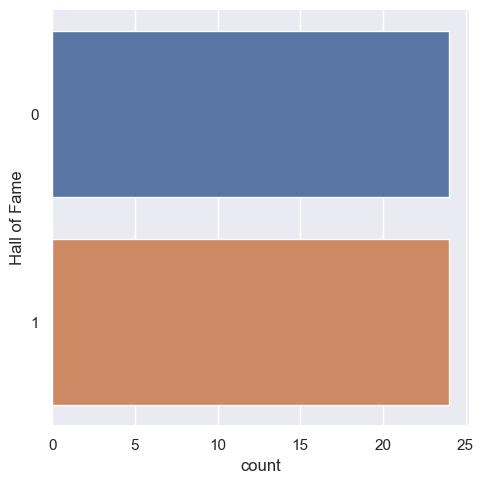

In [19]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_US, y_US = undersample.fit_resample(dfX, dfy)

f = plt.figure(figsize=(16, 8))
sb.catplot(y = "Hall of Fame", data = y_US, kind = "count")

In [20]:
# New dataset will be balanced with same number of Hall of Fame=True and Hall of Fame=False
data_US = pd.concat([X_US, y_US], axis=1)
data_US.head()

index  Year Drafted    GP   MIN   PTS  FGM  FGA   FG%  3P Made  3PA  ...  \
0    792          1998  39.0  13.8   5.6  2.2  4.4  50.0      0.2  0.5  ...   
1    522          1991  55.0  20.3  10.4  4.3  8.1  52.9      0.0  0.0  ...   
2   1368          2012  72.0  12.8   3.8  1.5  3.3  43.6      0.4  1.1  ...   
3    779          1998  30.0  11.0   3.2  1.2  3.2  36.5      0.1  0.2  ...   
4    737          1997  39.0  10.1   3.3  1.2  3.0  41.4      0.0  0.2  ...   

   OREB  DREB  REB  AST  STL  BLK  TOV   EFF  Retired  Hall of Fame  
0   0.7   1.3  1.9  0.5  0.2  0.1  0.5   5.1        1             0  
1   2.1   4.1  6.1  0.7  0.4  1.5  1.4  12.2        1             0  
2   0.3   1.6  1.9  1.9  0.6  0.1  1.1   5.2        1             0  
3   0.7   0.9  1.6  0.7  0.3  0.1  0.6   2.7        1             0  
4   0.6   1.2  1.7  0.9  0.4  0.1  0.8   3.5        1             0  

[5 rows x 24 columns]

In [21]:
#check count
print(data_US.groupby('Hall of Fame').size())

Hall of Fame
0    24
1    24
dtype: int64


Disadvantage: The deletion of observations in this random manner may lead to the deletion of some very useful information from the dataset

## Oversampling
### Random over-sampling is a technique that randomly samples a number of observations from the minority class (sampling is done with replacement) and adds them to the dataset.

<Figure size 1600x800 with 0 Axes>

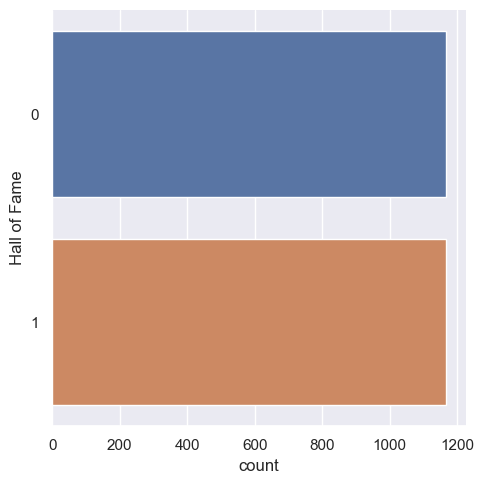

In [22]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_OS, y_OS = oversample.fit_resample(dfX, dfy)

f = plt.figure(figsize=(16, 8))
sb.catplot(y = "Hall of Fame", data = y_OS, kind = "count")

In [23]:
#new dataset will be balanced with same number of isfraud=1 and isfraud=0
data_OS = pd.concat([X_OS, y_OS], axis=1)
data_OS.head()

index  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  ...  \
0     11          1980  75.0  23.6  12.9  5.3  10.7  49.5      0.1  0.4  ...   
1     12          1980  74.0  17.0   5.4  1.9   3.9  47.8      0.0  0.1  ...   
2     13          1980  81.0  30.4   9.8  4.2   8.3  50.3      0.0  0.0  ...   
3     14          1980  59.0  10.1   3.2  1.4   3.1  45.4      0.0  0.1  ...   
4     15          1980  54.0  12.4   5.6  2.1   4.6  46.2      0.1  0.2  ...   

   OREB  DREB  REB  AST  STL  BLK  TOV   EFF  Retired  Hall of Fame  
0   0.4   1.5  1.9  3.6  0.8  0.1  2.9  10.2        1             0  
1   0.9   1.2  2.1  1.5  0.8  0.3  1.1   6.4        1             0  
2   3.3   5.3  8.6  2.7  0.7  1.0  1.6  16.5        1             0  
3   0.5   0.6  1.0  1.2  0.6  0.1  1.3   2.8        1             0  
4   0.6   0.6  1.2  1.0  0.4  0.0  0.9   4.3        1             0  

[5 rows x 24 columns]

In [24]:
#check count
print(data_OS.groupby('Hall of Fame').size())

Hall of Fame
0    1167
1    1167
dtype: int64


Disadvantage: This technique may increase the chance of model overfitting.

## SMOTE
### SMOTE is a technique that generates new observations by interpolating between observations in the original dataset. Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels.

<Figure size 1600x800 with 0 Axes>

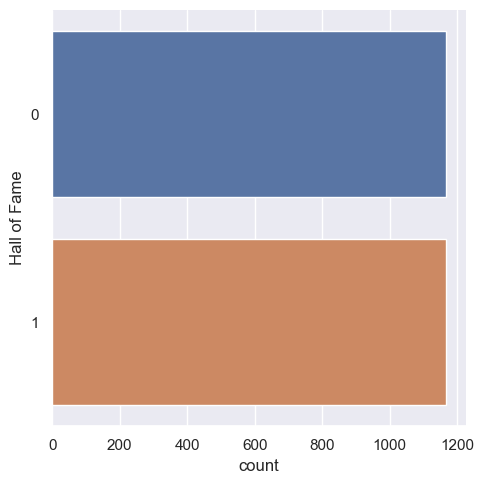

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_SM, y_SM = smote.fit_resample(dfX, dfy)

f = plt.figure(figsize=(16, 8))
sb.catplot(y = "Hall of Fame", data = y_SM, kind = "count")

In [26]:
#new dataset will be balanced with same number of Hall of Fame = True and Hall of Fame = False
data_SM = pd.concat([X_SM, y_SM], axis=1)
data_SM.head()

index  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  ...  \
0     11          1980  75.0  23.6  12.9  5.3  10.7  49.5      0.1  0.4  ...   
1     12          1980  74.0  17.0   5.4  1.9   3.9  47.8      0.0  0.1  ...   
2     13          1980  81.0  30.4   9.8  4.2   8.3  50.3      0.0  0.0  ...   
3     14          1980  59.0  10.1   3.2  1.4   3.1  45.4      0.0  0.1  ...   
4     15          1980  54.0  12.4   5.6  2.1   4.6  46.2      0.1  0.2  ...   

   OREB  DREB  REB  AST  STL  BLK  TOV   EFF  Retired  Hall of Fame  
0   0.4   1.5  1.9  3.6  0.8  0.1  2.9  10.2        1             0  
1   0.9   1.2  2.1  1.5  0.8  0.3  1.1   6.4        1             0  
2   3.3   5.3  8.6  2.7  0.7  1.0  1.6  16.5        1             0  
3   0.5   0.6  1.0  1.2  0.6  0.1  1.3   2.8        1             0  
4   0.6   0.6  1.2  1.0  0.4  0.0  0.9   4.3        1             0  

[5 rows x 24 columns]

In [27]:
#check count
print(data_SM.groupby('Hall of Fame').size())

Hall of Fame
0    1167
1    1167
dtype: int64


### We will decide which method to adopt by looking at the correlation between Hall of Fame and EFF after each method through a scatterplot graph.

index  Year Drafted        GP       MIN       PTS       FGM  \
index         1.000000      0.999056 -0.420784 -0.304803 -0.299804 -0.343970   
Year Drafted  0.999056      1.000000 -0.420979 -0.304175 -0.298663 -0.343246   
GP           -0.420784     -0.420979  1.000000  0.706101  0.613766  0.631632   
MIN          -0.304803     -0.304175  0.706101  1.000000  0.954063  0.948886   
PTS          -0.299804     -0.298663  0.613766  0.954063  1.000000  0.992490   
FGM          -0.343970     -0.343246  0.631632  0.948886  0.992490  1.000000   
FGA          -0.307461     -0.305971  0.613166  0.952325  0.984961  0.984607   
FG%          -0.513220     -0.515986  0.530007  0.466905  0.482865  0.520511   
3P Made       0.394107      0.399838  0.063400  0.200040  0.174037  0.128828   
3PA           0.360494      0.365359  0.067008  0.219830  0.199839  0.152422   
3P%           0.242614      0.238293 -0.040792 -0.214794 -0.223373 -0.243134   
FTM          -0.245220     -0.244081  0.525949  0.889010  0.945698  0.906741   
FTA          -0.268053     -0.268644  0.531020  0.910133  0.952440  0.926073   
FT%           0.204746      0.213779  0.114513  0.069649  0.088989  0.039238   
OREB         -0.304673     -0.310030  0.532821  0.697519  0.671877  0.699826   
DREB         -0.198213     -0.204095  0.519206  0.753027  0.748011  0.759880   
REB          -0.240613     -0.246407  0.542059  0.757674  0.744945  0.762721   
AST          -0.241275     -0.239225  0.426851  0.607526  0.565174  0.529724   
STL          -0.351026     -0.346640  0.502855  0.654547  0.665105  0.646516   
BLK          -0.150856     -0.154803  0.387004  0.600929  0.635461  0.634586   
TOV          -0.352322     -0.352821  0.613234  0.917807  0.904392  0.898589   
EFF          -0.309070     -0.310499  0.644514  0.929783  0.957165  0.951936   
Retired            NaN           NaN       NaN       NaN       NaN       NaN   
Hall of Fame -0.436183     -0.432207  0.618565  0.678950  0.692463  0.695916   

                   FGA       FG%   3P Made       3PA  ...      OREB      DREB  \
index        -0.307461 -0.513220  0.394107  0.360494  ... -0.304673 -0.198213   
Year Drafted -0.305971 -0.515986  0.399838  0.365359  ... -0.310030 -0.204095   
GP            0.613166  0.530007  0.063400  0.067008  ...  0.532821  0.519206   
MIN           0.952325  0.466905  0.200040  0.219830  ...  0.697519  0.753027   
PTS           0.984961  0.482865  0.174037  0.199839  ...  0.671877  0.748011   
FGM           0.984607  0.520511  0.128828  0.152422  ...  0.699826  0.759880   
FGA           1.000000  0.397164  0.231005  0.263275  ...  0.624522  0.683213   
FG%           0.397164  1.000000 -0.256035 -0.284204  ...  0.619539  0.623683   
3P Made       0.231005 -0.256035  1.000000  0.986533  ... -0.213642 -0.170168   
3PA           0.263275 -0.284204  0.986533  1.000000  ... -0.224894 -0.178883   
3P%          -0.195909 -0.290883  0.295470  0.279859  ... -0.410557 -0.341437   
FTM           0.898957  0.415852  0.083233  0.115886  ...  0.615442  0.721448   
FTA           0.909950  0.451871  0.048071  0.078862  ...  0.690525  0.795128   
FT%           0.075776  0.003431  0.338779  0.322147  ... -0.202720 -0.173019   
OREB          0.624522  0.619539 -0.213642 -0.224894  ...  1.000000  0.865066   
DREB          0.683213  0.623683 -0.170168 -0.178883  ...  0.865066  1.000000   
REB           0.683951  0.641723 -0.190639 -0.200589  ...  0.938534  0.984893   
AST           0.607579  0.005774  0.354075  0.412163  ...  0.004578  0.121701   
STL           0.693277  0.120894  0.222614  0.287913  ...  0.222103  0.237298   
BLK           0.551538  0.543937 -0.246055 -0.257938  ...  0.824606  0.852649   
TOV           0.907622  0.398703  0.127163  0.166721  ...  0.605876  0.723301   
EFF           0.907657  0.604631  0.014556  0.028154  ...  0.800759  0.876526   
Retired            NaN       NaN       NaN       NaN  ...       NaN       NaN   
Hall of Fame  0.675030  0.475649 -0.031104  0.003814  ...  0.494080  0.4

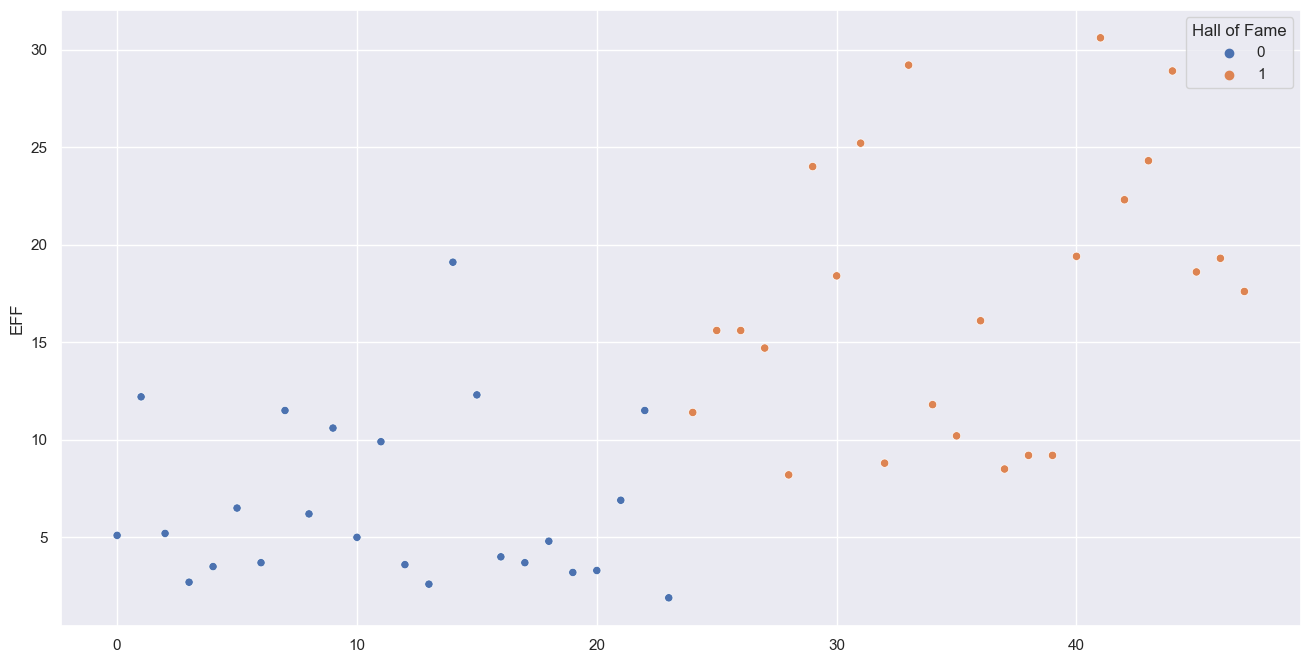

In [28]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=data_US, x=data_US.index, y='EFF', hue='Hall of Fame')
data_US.corr()

Correlation between **EFF** and **Hall of Fame** = **0.685915**

index  Year Drafted        GP       MIN       PTS       FGM  \
index         1.000000      0.999237 -0.416161 -0.253191 -0.305901 -0.344541   
Year Drafted  0.999237      1.000000 -0.415787 -0.255138 -0.308339 -0.347147   
GP           -0.416161     -0.415787  1.000000  0.638930  0.575687  0.592914   
MIN          -0.253191     -0.255138  0.638930  1.000000  0.934319  0.929612   
PTS          -0.305901     -0.308339  0.575687  0.934319  1.000000  0.991630   
FGM          -0.344541     -0.347147  0.592914  0.929612  0.991630  1.000000   
FGA          -0.306888     -0.309120  0.564766  0.939103  0.981940  0.983118   
FG%          -0.351879     -0.352316  0.489812  0.395833  0.445018  0.479894   
3P Made       0.333747      0.333406  0.007771  0.193142  0.142972  0.098501   
3PA           0.327676      0.327364 -0.003899  0.201212  0.153686  0.108034   
3P%           0.218218      0.217315  0.036101  0.029349  0.003454 -0.014385   
FTM          -0.248104     -0.249818  0.493720  0.853838  0.937252  0.892184   
FTA          -0.264887     -0.267837  0.514815  0.880319  0.944979  0.911987   
FT%           0.042189      0.044790  0.101480  0.153400  0.185627  0.133361   
OREB         -0.258511     -0.260003  0.502143  0.699945  0.694590  0.718473   
DREB         -0.126271     -0.130887  0.473185  0.734607  0.736246  0.744647   
REB          -0.175206     -0.178875  0.495625  0.741348  0.740357  0.754212   
AST          -0.217111     -0.218210  0.365182  0.565801  0.508902  0.477243   
STL          -0.339288     -0.336260  0.439903  0.656915  0.650414  0.633428   
BLK          -0.124302     -0.127470  0.363945  0.557987  0.584244  0.580852   
TOV          -0.324164     -0.327544  0.573930  0.903425  0.899128  0.893487   
EFF          -0.287400     -0.290114  0.602335  0.912161  0.953905  0.946382   
Retired            NaN           NaN       NaN       NaN       NaN       NaN   
Hall of Fame -0.479581     -0.477156  0.591477  0.626669  0.672754  0.679194   

                   FGA       FG%   3P Made       3PA  ...      OREB      DREB  \
index        -0.306888 -0.351879  0.333747  0.327676  ... -0.258511 -0.126271   
Year Drafted -0.309120 -0.352316  0.333406  0.327364  ... -0.260003 -0.130887   
GP            0.564766  0.489812  0.007771 -0.003899  ...  0.502143  0.473185   
MIN           0.939103  0.395833  0.193142  0.201212  ...  0.699945  0.734607   
PTS           0.981940  0.445018  0.142972  0.153686  ...  0.694590  0.736246   
FGM           0.983118  0.479894  0.098501  0.108034  ...  0.718473  0.744647   
FGA           1.000000  0.347679  0.212812  0.228499  ...  0.635797  0.670263   
FG%           0.347679  1.000000 -0.323209 -0.352458  ...  0.612286  0.550564   
3P Made       0.212812 -0.323209  1.000000  0.990526  ... -0.238040 -0.161942   
3PA           0.228499 -0.352458  0.990526  1.000000  ... -0.252866 -0.177881   
3P%           0.054713 -0.287625  0.492376  0.482808  ... -0.330751 -0.239614   
FTM           0.878721  0.391475  0.051464  0.066160  ...  0.639239  0.703759   
FTA           0.889960  0.433308  0.026348  0.037070  ...  0.726709  0.786923   
FT%           0.176059 -0.127451  0.231607  0.240977  ... -0.190893 -0.140733   
OREB          0.635797  0.612286 -0.238040 -0.252866  ...  1.000000  0.886512   
DREB          0.670263  0.550564 -0.161942 -0.177881  ...  0.886512  1.000000   
REB           0.674539  0.588331 -0.193318 -0.209410  ...  0.948260  0.987371   
AST           0.563258 -0.073459  0.393500  0.425897  ... -0.038882  0.056179   
STL           0.676871  0.142401  0.243104  0.283829  ...  0.200642  0.232345   
BLK           0.495137  0.503596 -0.255308 -0.273695  ...  0.829528  0.848495   
TOV           0.906173  0.338950  0.155032  0.167790  ...  0.624956  0.704231   
EFF           0.899598  0.560324 -0.006097 -0.004418  ...  0.815923  0.868718   
Retired            NaN       NaN       NaN       NaN  ...       NaN       NaN   
Hall of Fame  0.637617  0.505917 -0.063496 -0.064821  ...  0.543423  0.4

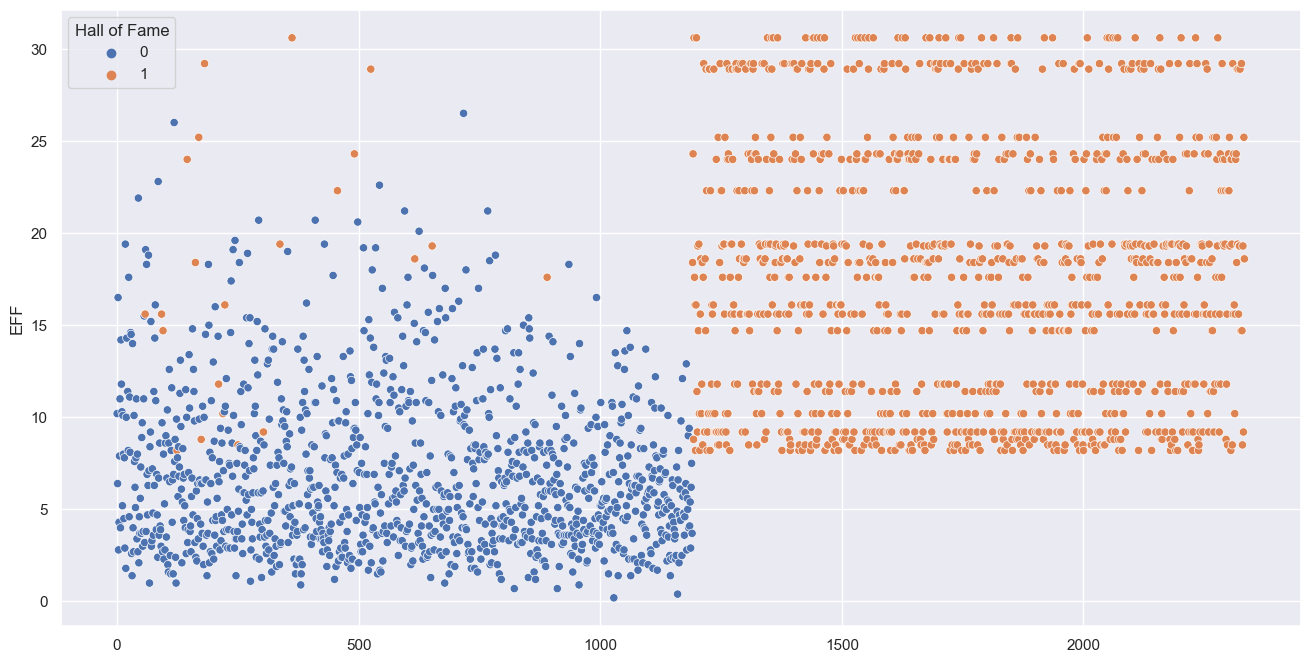

In [29]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=data_OS, x=data_OS.index, y='EFF', hue='Hall of Fame')
data_OS.corr()

Correlation between **EFF** and **Hall of Fame** = **0.676430**

index  Year Drafted        GP       MIN       PTS       FGM  \
index         1.000000      0.998773 -0.434825 -0.271199 -0.329833 -0.366560   
Year Drafted  0.998773      1.000000 -0.442379 -0.284690 -0.344466 -0.380502   
GP           -0.434825     -0.442379  1.000000  0.673067  0.618381  0.631997   
MIN          -0.271199     -0.284690  0.673067  1.000000  0.939358  0.934460   
PTS          -0.329833     -0.344466  0.618381  0.939358  1.000000  0.992543   
FGM          -0.366560     -0.380502  0.631997  0.934460  0.992543  1.000000   
FGA          -0.327188     -0.341034  0.610423  0.943779  0.983363  0.985489   
FG%          -0.372668     -0.379554  0.508439  0.451517  0.502228  0.529176   
3P Made       0.371926      0.366141  0.012534  0.190698  0.133962  0.089696   
3PA           0.369340      0.363738  0.003043  0.196335  0.141057  0.096212   
3P%           0.210298      0.207450  0.028116  0.008218 -0.012691 -0.027549   
FTM          -0.283994     -0.298568  0.546005  0.866341  0.943432  0.903521   
FTA          -0.295991     -0.311756  0.558469  0.885092  0.948524  0.918288   
FT%           0.035253      0.035881  0.124202  0.135830  0.155120  0.111747   
OREB         -0.288394     -0.299827  0.529002  0.745501  0.749738  0.765801   
DREB         -0.167751     -0.182682  0.504779  0.779226  0.786469  0.788527   
REB          -0.213147     -0.227202  0.524151  0.784280  0.790440  0.797268   
AST          -0.254713     -0.262132  0.431450  0.588441  0.531757  0.508870   
STL          -0.383522     -0.387569  0.528086  0.701172  0.691555  0.683646   
BLK          -0.147803     -0.161935  0.396258  0.624728  0.656441  0.646269   
TOV          -0.356472     -0.371957  0.620318  0.913456  0.918241  0.913823   
EFF          -0.317563     -0.332270  0.634517  0.922423  0.961308  0.953366   
Retired            NaN           NaN       NaN       NaN       NaN       NaN   
Hall of Fame -0.489223     -0.503444  0.600530  0.657700  0.716990  0.719061   

                   FGA       FG%   3P Made       3PA  ...      OREB      DREB  \
index        -0.327188 -0.372668  0.371926  0.369340  ... -0.288394 -0.167751   
Year Drafted -0.341034 -0.379554  0.366141  0.363738  ... -0.299827 -0.182682   
GP            0.610423  0.508439  0.012534  0.003043  ...  0.529002  0.504779   
MIN           0.943779  0.451517  0.190698  0.196335  ...  0.745501  0.779226   
PTS           0.983363  0.502228  0.133962  0.141057  ...  0.749738  0.786469   
FGM           0.985489  0.529176  0.089696  0.096212  ...  0.765801  0.788527   
FGA           1.000000  0.413107  0.196394  0.209300  ...  0.696319  0.728785   
FG%           0.413107  1.000000 -0.302662 -0.334405  ...  0.622702  0.565410   
3P Made       0.196394 -0.302662  1.000000  0.989837  ... -0.209100 -0.115239   
3PA           0.209300 -0.334405  0.989837  1.000000  ... -0.223458 -0.130449   
3P%           0.038655 -0.289118  0.518555  0.511377  ... -0.322962 -0.243256   
FTM           0.887240  0.464715  0.047000  0.056740  ...  0.711044  0.764195   
FTA           0.894868  0.499360  0.020099  0.026282  ...  0.785277  0.831576   
FT%           0.152273 -0.116662  0.250494  0.258911  ... -0.186676 -0.130795   
OREB          0.696319  0.622702 -0.209100 -0.223458  ...  1.000000  0.905646   
DREB          0.728785  0.565410 -0.115239 -0.130449  ...  0.905646  1.000000   
REB           0.732533  0.599069 -0.150851 -0.166166  ...  0.957704  0.989198   
AST           0.579496  0.021651  0.349174  0.380789  ...  0.058370  0.132936   
STL           0.712792  0.253755  0.177831  0.212865  ...  0.323677  0.333141   
BLK           0.576382  0.511100 -0.194227 -0.212780  ...  0.846230  0.880992   
TOV           0.920846  0.414621  0.128943  0.139728  ...  0.696233  0.755789   
EFF           0.913683  0.594414  0.004095  0.002968  ...  0.849977  0.893258   
Retired            NaN       NaN       NaN       NaN  ...       NaN       NaN   
Hall of Fame  0.678837  0.532508 -0.071328 -0.073133  ...  0.591829  0.5

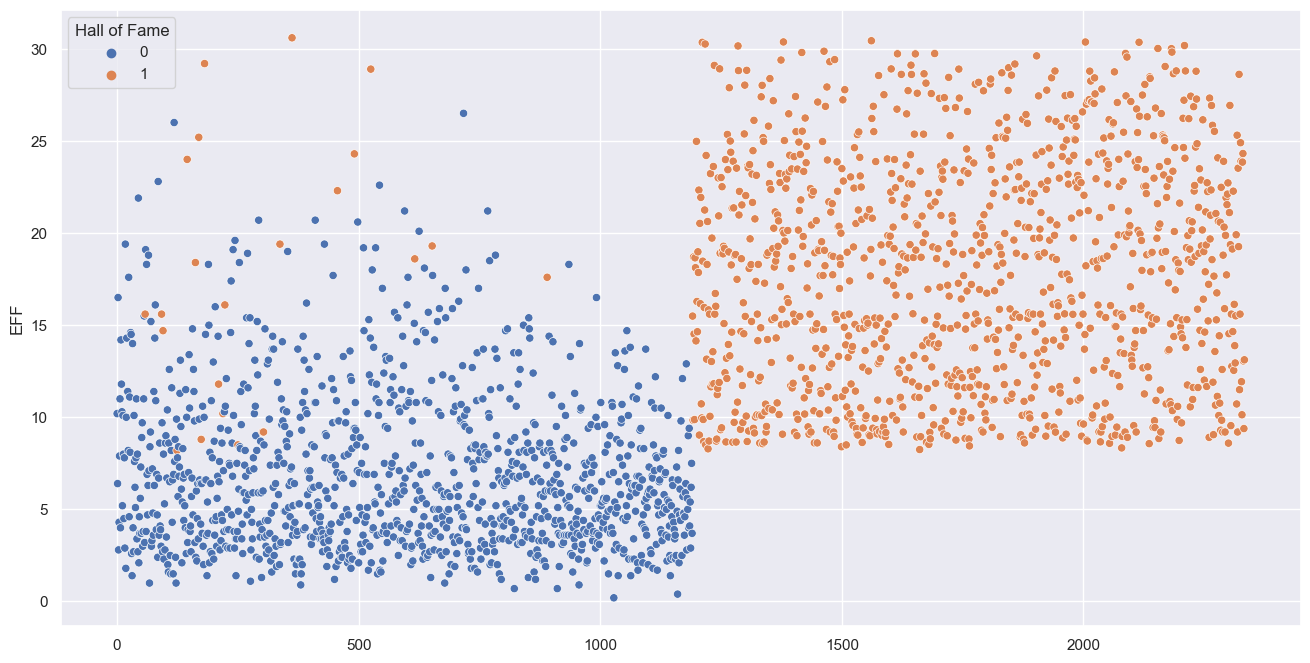

In [30]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=data_SM, x=data_SM.index, y='EFF', hue='Hall of Fame')
data_SM.corr()

Correlation between **EFF** and **Hall of Fame** = **0.719788**

Considering the disadvantages of Undersampling and Oversampling, **SMOTE** will be the best way to balance our dataset, furthermore, **SMOTE** has the highest correlation between **EFF** and **Hall of Fame** among the 3 methods.

## Let's do some data visualisation

<AxesSubplot:xlabel='Hall of Fame', ylabel='PTS'>

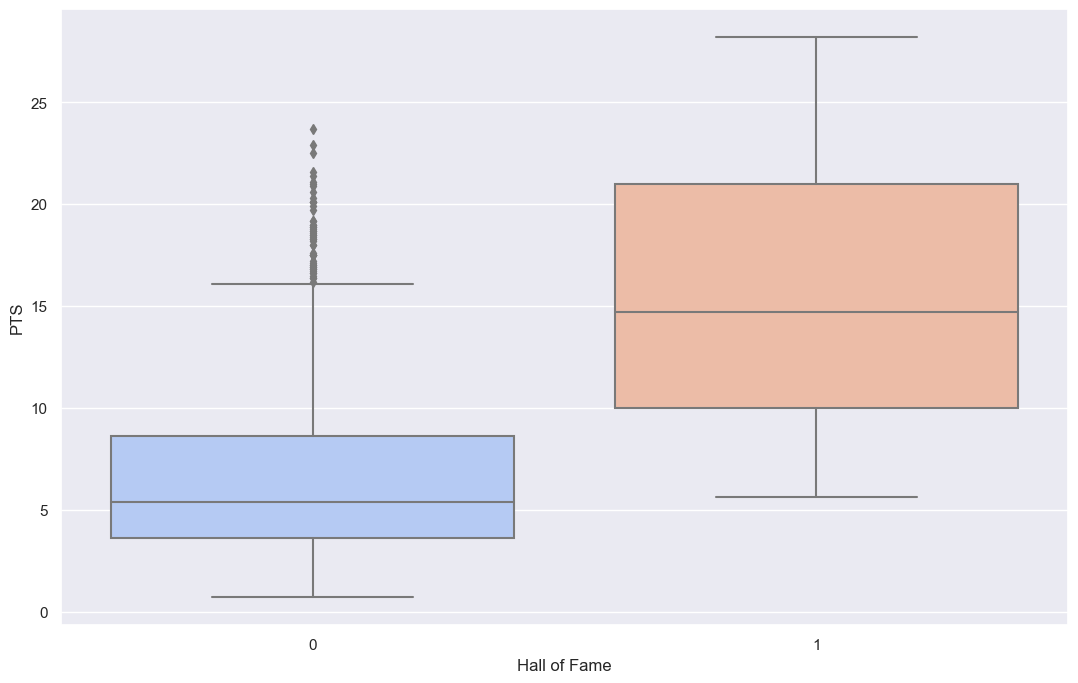

In [31]:
fig, ax = plt.subplots(figsize=(13,8))
sb.boxplot(x='Hall of Fame',y='PTS',data=rookiedata,palette='coolwarm')

<AxesSubplot:xlabel='Hall of Fame', ylabel='MIN'>

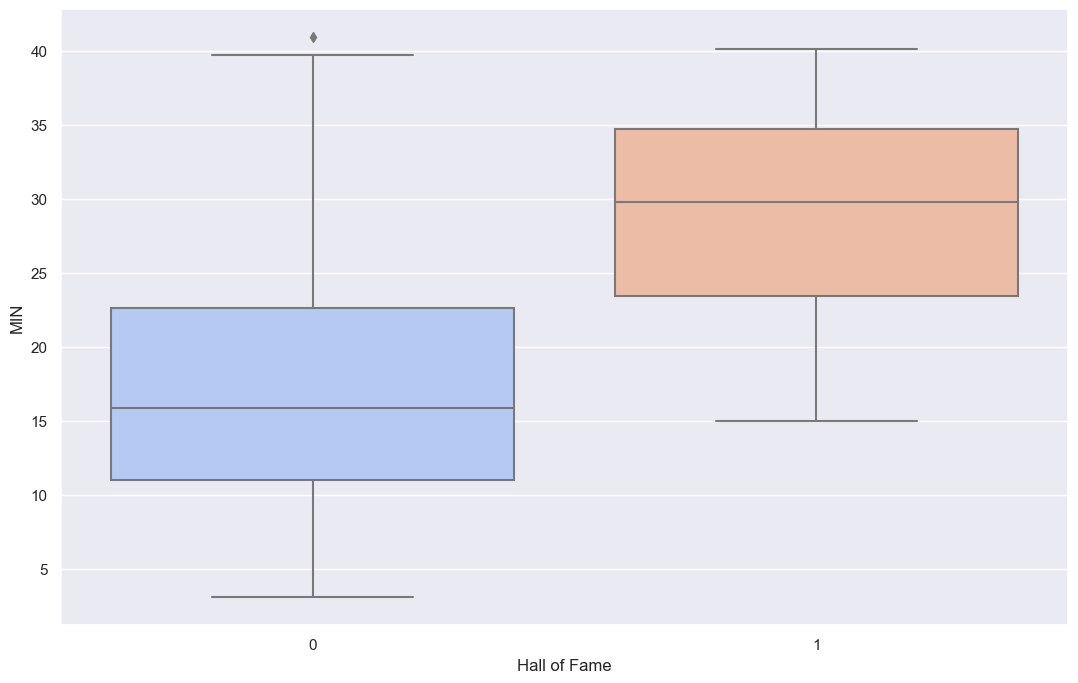

In [32]:
fig, ax = plt.subplots(figsize=(13,8))
sb.boxplot(x='Hall of Fame',y='MIN',data=rookiedata,palette='coolwarm')

<AxesSubplot:xlabel='Hall of Fame', ylabel='MIN'>

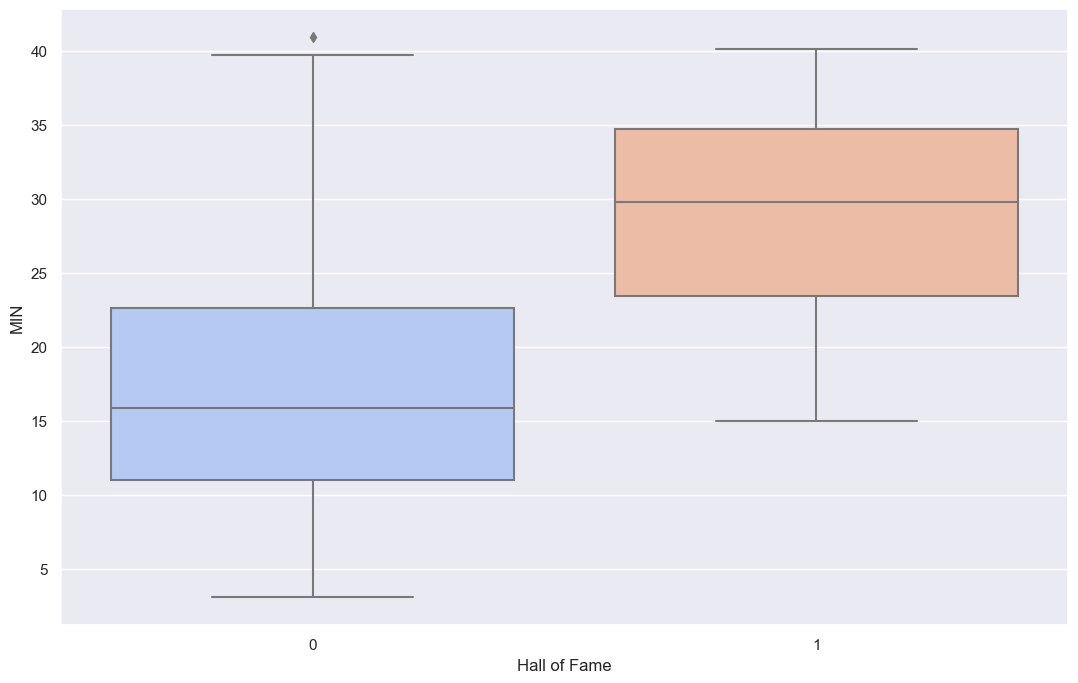

In [33]:
fig, ax = plt.subplots(figsize=(13,8))
sb.boxplot(x='Hall of Fame',y='MIN',data=rookiedata,palette='coolwarm')

<AxesSubplot:xlabel='Hall of Fame', ylabel='AST'>

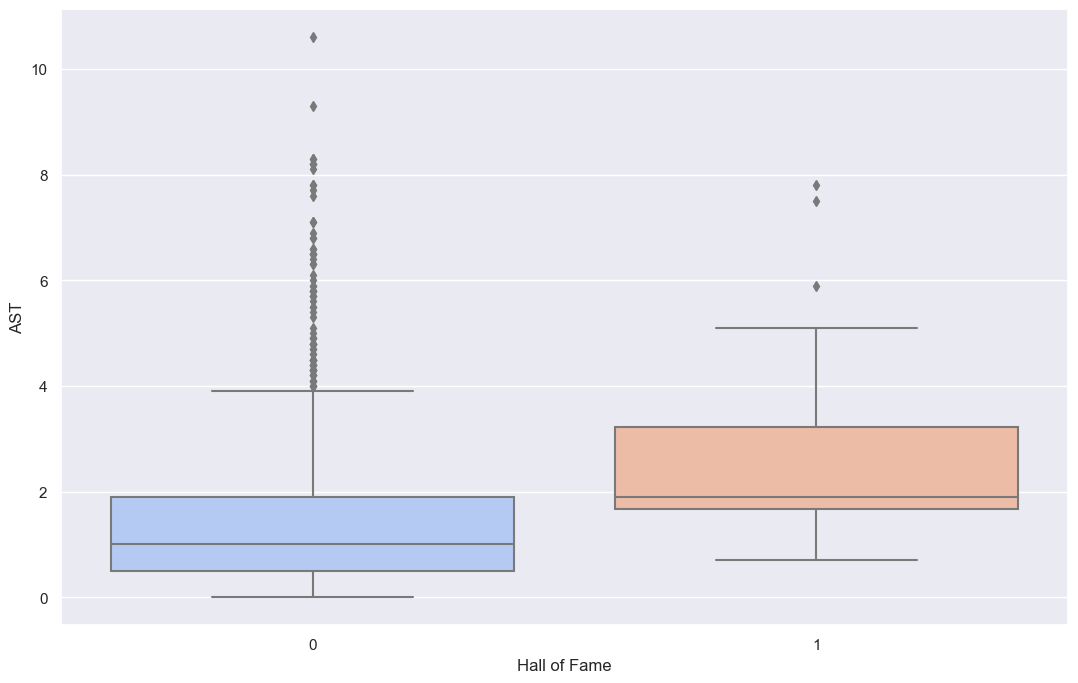

In [34]:
fig, ax = plt.subplots(figsize=(13,8))
sb.boxplot(x='Hall of Fame',y='AST',data=rookiedata,palette='coolwarm')

<AxesSubplot:xlabel='Hall of Fame', ylabel='STL'>

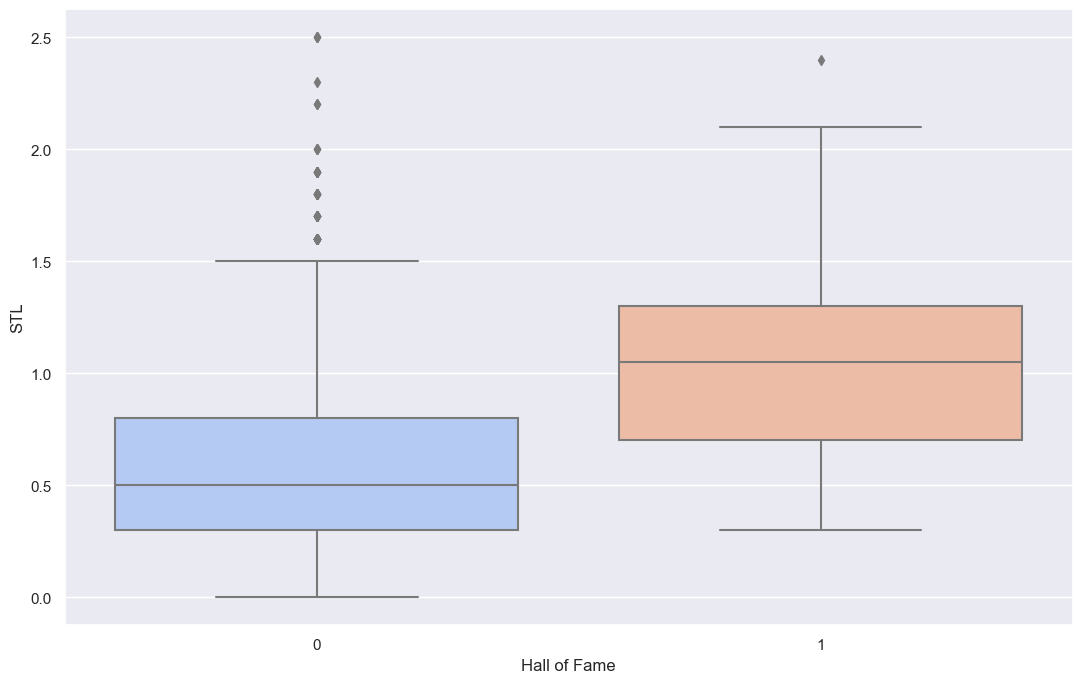

In [35]:
fig, ax = plt.subplots(figsize=(13,8))
sb.boxplot(x='Hall of Fame',y='STL',data=rookiedata,palette='coolwarm')

<AxesSubplot:xlabel='Hall of Fame', ylabel='BLK'>

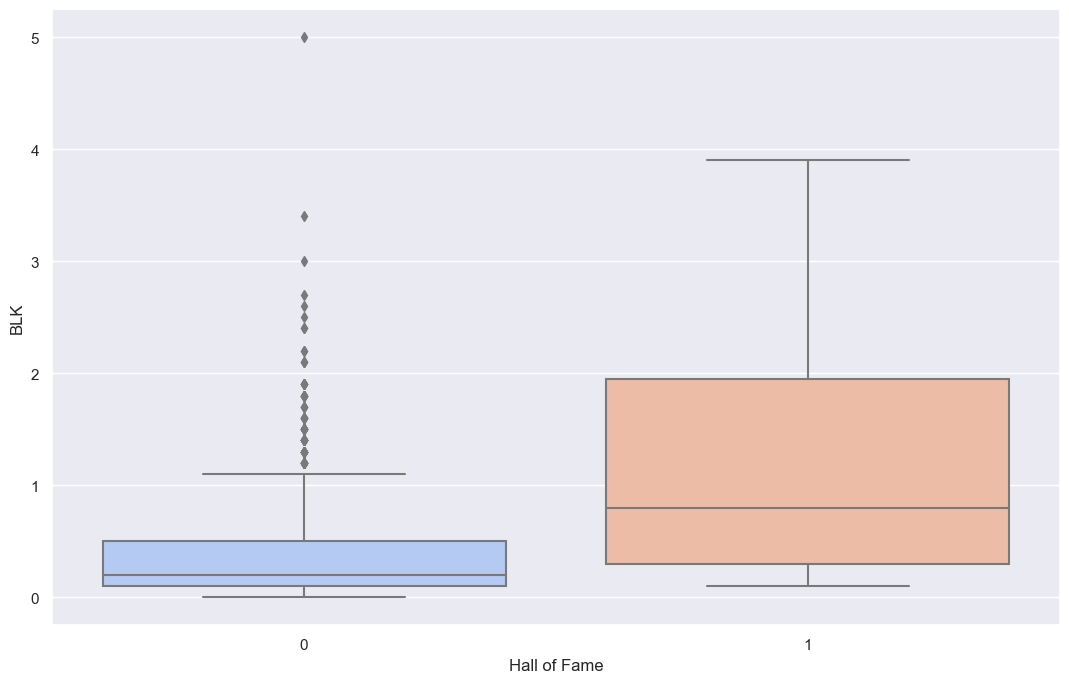

In [36]:
fig, ax = plt.subplots(figsize=(13,8))
sb.boxplot(x='Hall of Fame',y='BLK',data=rookiedata,palette='coolwarm')

<AxesSubplot:xlabel='Hall of Fame', ylabel='Year Drafted'>

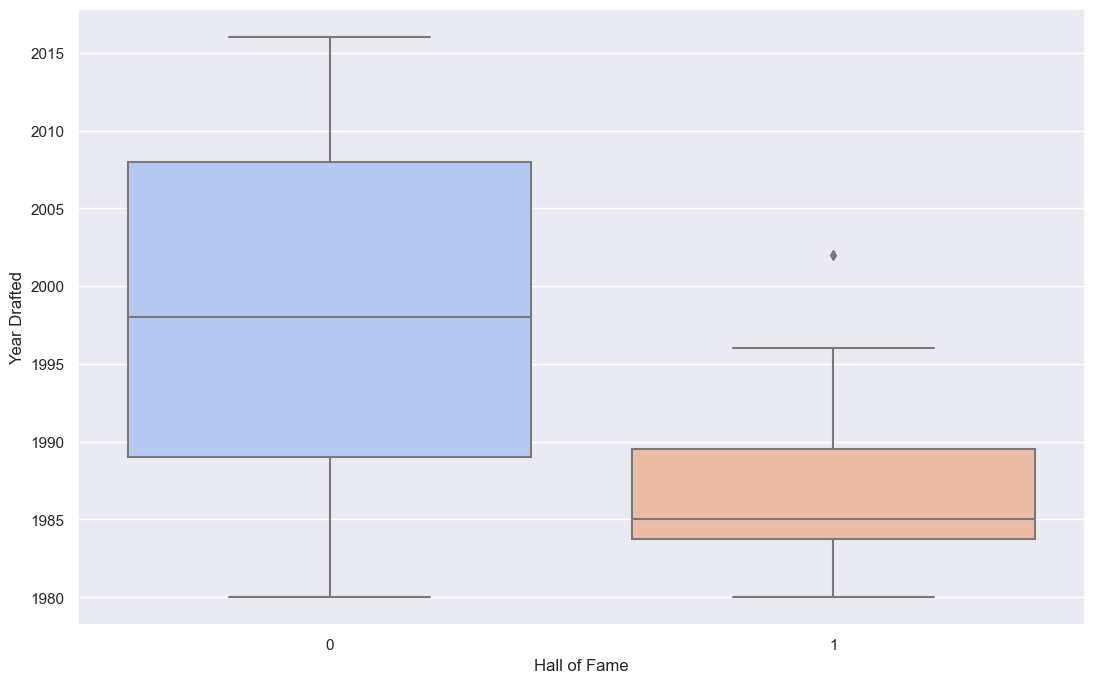

In [37]:
fig, ax = plt.subplots(figsize=(13,8))
sb.boxplot(x='Hall of Fame',y='Year Drafted',data=rookiedata,palette='coolwarm')

### It seems like Points(PTS) , Efficiency of a player(EFF), Minutes Played in Game(MIN) might have a good relation with the player getting in Hall of Fame

### The players getting in Hall of Fame are mostly from the 1980s to 1990s. This makes sense because players cannot get into Hall of Fame when they are still an active player. Acceptance in Hall of Fame only happens after a player's career ends for a certain number of years.

In [38]:
import plotly.express as px
px.scatter(
        rookiedata, x="PTS", y="FG%", color='Hall of Fame', 
        hover_data=['Name'])

In [39]:
px.scatter(
        rookiedata, x="PTS", y="EFF", color='Hall of Fame', 
        hover_data=['Name'])

In [40]:
px.scatter(
        rookiedata, x="PTS", y="MIN", color='Hall of Fame', 
        hover_data=['Name'])

### As we can see, the player Points and Minutes Played in Match and the player Points and Efficiency is crucial in determining whether they get into Hall of Fame because the yellow dots in the graph(indicating True for HoF) are usually in the upper right of the graph

<AxesSubplot:>

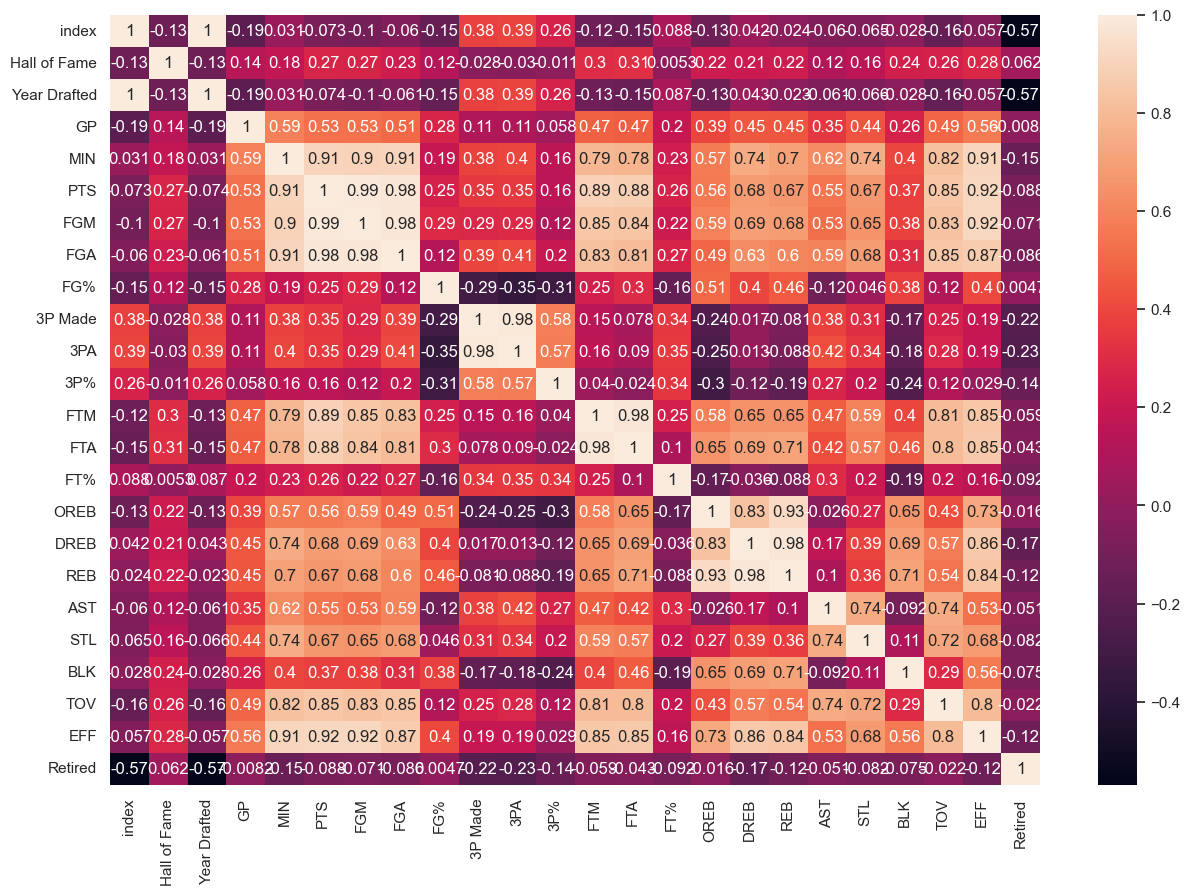

In [41]:
fig, ax = plt.subplots(figsize=(15,10))
sb.heatmap(rookiedata.corr(),annot=True)

### Logistic Regression. We can separate the dataset, players that started their careers before 2000s will be in the training data. Then we can predict which current players can enter HoF based on their current statistics.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [43]:
new_players=rookiedata[rookiedata['Year Drafted']>1990]
old_players=rookiedata[rookiedata['Year Drafted']<1990]
X_train=old_players.drop(['index','Hall of Fame','Name','3P%'],axis=1)
y_train=old_players['Hall of Fame']
X_test=new_players.drop(['index','Hall of Fame','Name','3P%'],axis=1)
y_test=new_players['Hall of Fame']

In [44]:
logmodel=LogisticRegression(max_iter=2000)
logmodel.fit(X_train,y_train)
pred_log=logmodel.predict(X_test)
log_prob=logmodel.predict_proba(X_test)[:,0-1]

In [45]:
print('Logistic Regression')
print(confusion_matrix(y_test,pred_log))
print(classification_report(y_test,pred_log, zero_division=1))

Logistic Regression
[[1008    1]
 [   3    3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       0.75      0.50      0.60         6

    accuracy                           1.00      1015
   macro avg       0.87      0.75      0.80      1015
weighted avg       1.00      1.00      1.00      1015



## Let's see who are the younger players that got predicted to enter Hall of Fame

In [46]:
res=pd.concat([X_test,y_test],axis=1)

In [47]:
res['log_pred']=pred_log
res['log_prob']=log_prob

In [48]:
res_final=pd.concat([res,rookiedata['Name']],axis=1)
res_final[(res_final['Hall of Fame']==0)&(res_final['log_pred']==1)].head(60)

Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  FTM  ...  \
543        1993.0  76.0  32.1  17.5  7.5  13.6  55.2      0.0  0.2  2.5  ...   

     AST  STL  BLK  TOV   EFF  Retired  Hall of Fame  log_pred  log_prob  \
543  3.6  1.2  2.2  2.7  22.6      1.0           0.0       1.0  0.804698   

             Name  
543  Chris Webber  

[1 rows x 25 columns]